# Fintech & DSS Hackathon - Tutorial Document

This document will outline a very basic tutorial on how to use the yahoo finance API to get stock data and forecast the future stock predictions using Linear Regression

You can either run this notebook on your local machine or on Google Colab. If you are running this on your local machine, you will need to install the required libraries. If you are running this on Google Colab, you can directly run the cells.

## 1: Importing the necessary libraries

### For Google Colab Users

Run the cell below:

In [118]:
# ignore this if you already have the libraries downloaded

# For Google Colab users, you can run this cell to install the required libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install yfinance


### For Local Machine Users

You should create a virtual environment and install the necessary libraries. You may use your favourite tool (venv, conda, etc.) to create the virtual environment.

I will be using venv to create the virtual environment. Run the following commands in your terminal:

```bash
python3 -m venv tutorial-env
source tutorial-env/bin/activate
pip install -r requirements.txt
```

### For Both Google Colab and Local Machine Users

In [119]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

import yfinance as yf 

In [120]:
%matplotlib inline

## 2. Data Collection and Exploration

In [93]:
# get the Ticker object for NVIDIA 
# it allows you to get market and meta data for a security, using a pythonic way
nvda = yf.Ticker("NVDA")

In [94]:
# get info on the the company
nvda.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [95]:
# get historical market data
history = nvda.history(period="max")
# create a dataframe from the historical data
df = pd.DataFrame(history)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0


Very basic explanation of the history data:

- Open: The price at the beginning of the trading day.
- High: The highest price reached during the day.
- Low: The lowest price reached during the day.
- Close: The price at the end of the trading day.
- Volume: The number of shares traded.
- Dividends: The dividend yield (annual dividend per share divided by the stock price) and the dividend payout ratio.
- Stock Splits: A history of stock splits, including the date and ratio.

In [96]:
x = df.index
y = df['Close']
y

Date
1999-01-22 00:00:00-05:00      0.037618
1999-01-25 00:00:00-05:00      0.041559
1999-01-26 00:00:00-05:00      0.038334
1999-01-27 00:00:00-05:00      0.038215
1999-01-28 00:00:00-05:00      0.038095
                                ...    
2024-10-11 00:00:00-04:00    134.800003
2024-10-14 00:00:00-04:00    138.070007
2024-10-15 00:00:00-04:00    131.600006
2024-10-16 00:00:00-04:00    135.720001
2024-10-17 00:00:00-04:00    137.400101
Name: Close, Length: 6477, dtype: float64

In [97]:
# define function to plot the data
def df_plot(x, y, title="", xlabel="Date", ylabel="", dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

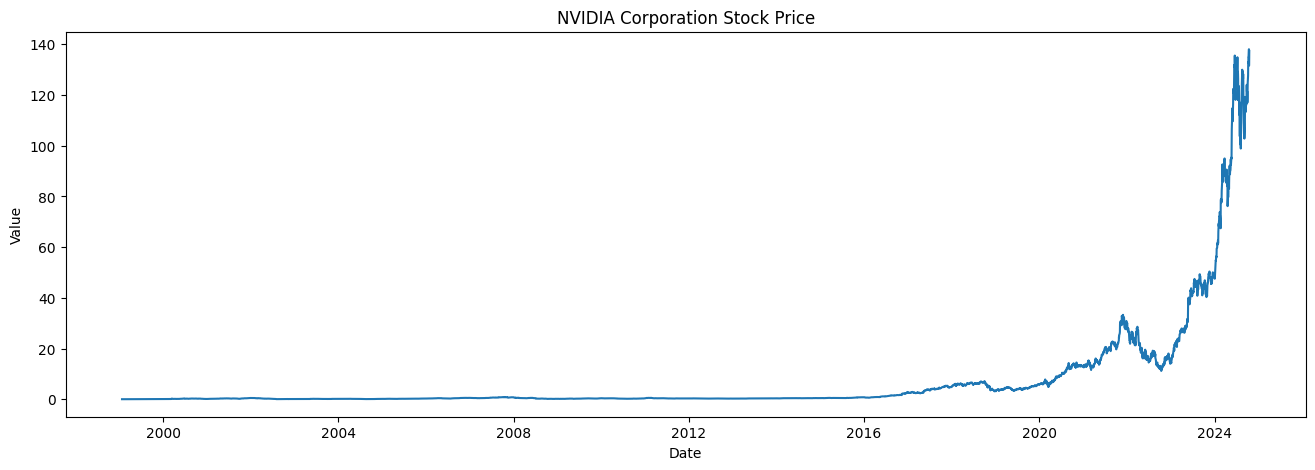

In [98]:
stock_name = nvda.info['shortName']
title = f"{stock_name} Stock Price"

df_plot(x, y, title=title, ylabel="Value")

In [99]:
df.reset_index(inplace=True)

In [100]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0


In [101]:
# We declare the Dividends and Stock Splits unnecessary for our analysis and drop them

df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True) 
df.head()

,Date,Open,High,Low,Close,Volume
0,1999-01-22 00:00:00-05:00,0.040125,0.044783,0.035587,0.037618,2714688000
1,1999-01-25 00:00:00-05:00,0.040603,0.042036,0.037618,0.041559,510480000
2,1999-01-26 00:00:00-05:00,0.042036,0.042872,0.037737,0.038334,343200000
3,1999-01-27 00:00:00-05:00,0.038453,0.039409,0.036303,0.038215,244368000
4,1999-01-28 00:00:00-05:00,0.038215,0.038453,0.037856,0.038095,227520000


In [102]:
# df.info() gives us the information about the data types of the columns and the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   Date    6477 non-null   datetime64[ns, America/New_York]
 1   Open    6477 non-null   float64                         
 2   High    6477 non-null   float64                         
 3   Low     6477 non-null   float64                         
 4   Close   6477 non-null   float64                         
 5   Volume  6477 non-null   int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 303.7 KB


In [103]:
# find any null values in the dataset
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [104]:
# df.describe() gives us the statistical summary of the dataframe
df.describe()

,Open,High,Low,Close,Volume
count,6477.000000,6477.000000,6477.000000,6477.000000,6.477000e+03
mean,7.157595,7.292360,7.012781,7.159292,6.036708e+08
std,19.196762,19.564975,18.779888,19.190288,4.313157e+08
min,0.032005,0.032602,0.030571,0.031289,1.968000e+07
25%,0.255798,0.263202,0.249006,0.255655,3.432000e+08
50%,0.432056,0.438689,0.424528,0.432056,5.043000e+08
75%,4.300832,4.394205,4.256795,4.309253,7.348080e+08
max,139.788047,140.889999,136.869995,138.070007,9.230856e+09


## 3. Data Preprocessing

We now define the features and the target variable. 

Features are the columns that we will use to predict the target variable. In this case, we will use the 'Close' column as the target variable. We will use the 'Open', 'High', 'Low', and 'Volume' columns as the features.

Or in other words, we will use the opening price, highest price, lowest price, and the volume of the stock as the features to predict the closing price of the stock.

In [105]:
# obtain the columns needed for the analysis
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

We need to split the data into two segments: training data and testing data. We will use the training data to train the model and the testing data to evaluate the model.

The training data helps the machine learn patterns and relationships in the data. Whereas the testing data evaluates how well the machine has learned and how it performs on new unseen data.

In [106]:
# split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=False, random_state=0)

In [107]:
print(f"{x_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

x_train.shape=(5181, 4)
x_test.shape=(1296, 4)
y_train.shape=(5181,)
y_test.shape=(1296,)


We will use Linear Regression to predict the closing price of the stock.

Linear Regression is a statistical method which used to model the relationship between a dependent variable (target) and one or more independent variables (features).
It assumes that the relationship is linear, meaning it can be represented by a straight line. 

In simple terms, it tries to find the best line that fits the data points.

For our case, the equation of the line will be:

$$y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + b$$

where:
- y is the target variable (closing price)
- x1, x2, x3, x4 are the features (open, high, low, volume)
- m1, m2, m3, m4 are the coefficients of the features
- b is the intercept

The model tries to find the best values for the coefficients and the intercept that minimizes the error between the predicted values and the actual values.

## 4. Model Training and Evaluation

In [108]:
from sklearn.linear_model import LinearRegression

# create a Linear Regression model
model = LinearRegression()

# fit the model to the training data (i.e. train the model)
model.fit(x_train, y_train)

# show the model's intercept and coefficients
print(f"{model.intercept_=}")
print(f"{model.coef_=}")

model.intercept_=np.float64(-0.0002092170988373665)
model.coef_=array([-6.45088361e-01,  8.43449593e-01,  8.02000171e-01, -1.47418520e-14])


In [110]:
# show a table comparing the actual values to the predicted values

y_pred = model.predict(x_test)
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfr.head()

,Actual,Predicted
5181,4.112158,4.103856
5182,4.021440,4.027052
5183,4.010991,4.022690
5184,4.154792,4.172367
5185,4.167479,4.202836


In [111]:
dfr.describe()

,Actual,Predicted
count,1296.000000,1296.000000
mean,32.157527,32.148522
std,32.416372,32.395336
min,4.010991,4.022690
25%,12.983001,13.012026
50%,19.159296,19.104455
75%,42.087164,42.077385
max,138.070007,139.022772


To evaluate the model, we will use the Mean Absolute Error (MAE) metrics. It is the average of the absolute differences between the predicted values and the actual values. It provides a simple, intuitive way to assess how far off teh model's predictions are from the actual values.

Formula:

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y_{i}}|$$

where:
- n is the number of data points
- y_{i} is the actual value
- \hat{y_{i}} is the predicted value

Interpretation:

- Lower MAE: Indicates that the model's predictions are closer to the actual values, which is generally better
- Higher MAE: Indicates that the model's predictions are further from the actual values, which is generally worse

The MAE metric is easy to understand and robust to outliers, but it does not penalize large errors as much as other metrics like Mean Squared Error (MSE).

Usually, we will use a combination of metrics to evaluate the model, but for this tutorial and hackathon, we will stick with MAE.

In [121]:
# calculate the Mean Absolute Error  

mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"{mae=}")

mae=np.float64(0.28304343148159256)


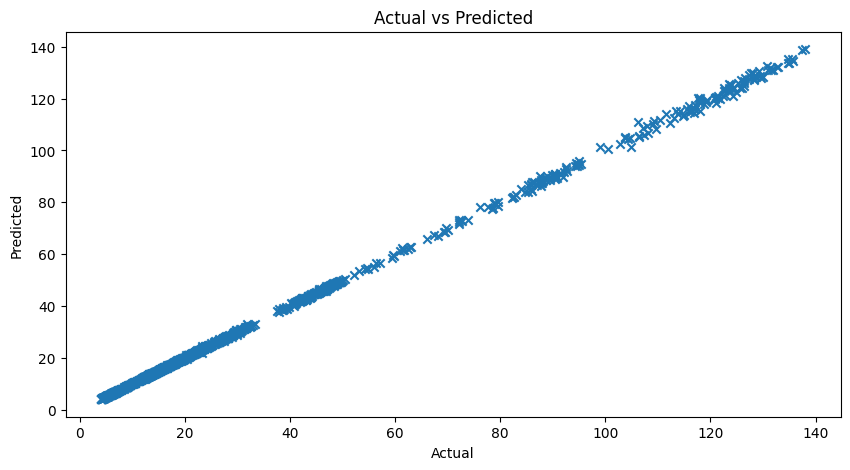

In [113]:
def scatter_plot(y_test, y_pred, title, xlabel, ylabel, dpi=100):
    plt.figure(figsize=(10, 5), dpi=dpi)
    plt.scatter(y_test, y_pred, color='tab:blue', marker='x')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

scatter_plot(y_test, y_pred, title="Actual vs Predicted", xlabel="Actual", ylabel="Predicted")

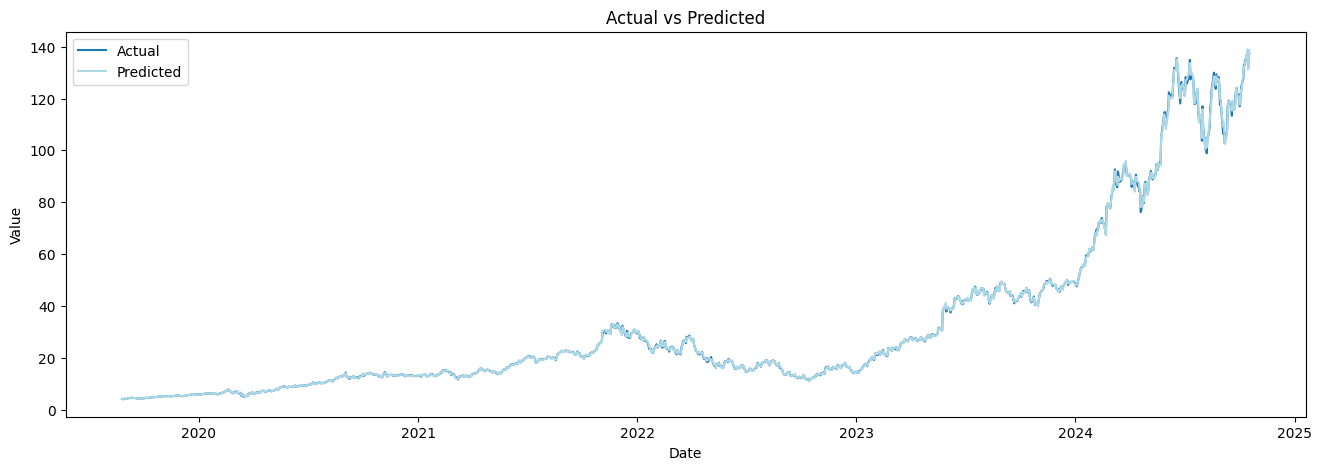

In [115]:
# get the dates for the test data
dates = df['Date'].iloc[y_test.index]

# create a dataframe for the actual and predicted values
dfp = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred})

# plot the actual and predicted values as line graphs
def dfp_plot(x, y1, y2, title="", xlabel="Date", ylabel="Value", dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y1, color='tab:blue', label='Actual')
    plt.plot(x, y2, color='lightblue', label='Predicted')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

dfp_plot(dfp['Date'], dfp['Actual'], dfp['Predicted'], title="Actual vs Predicted", ylabel="Value")

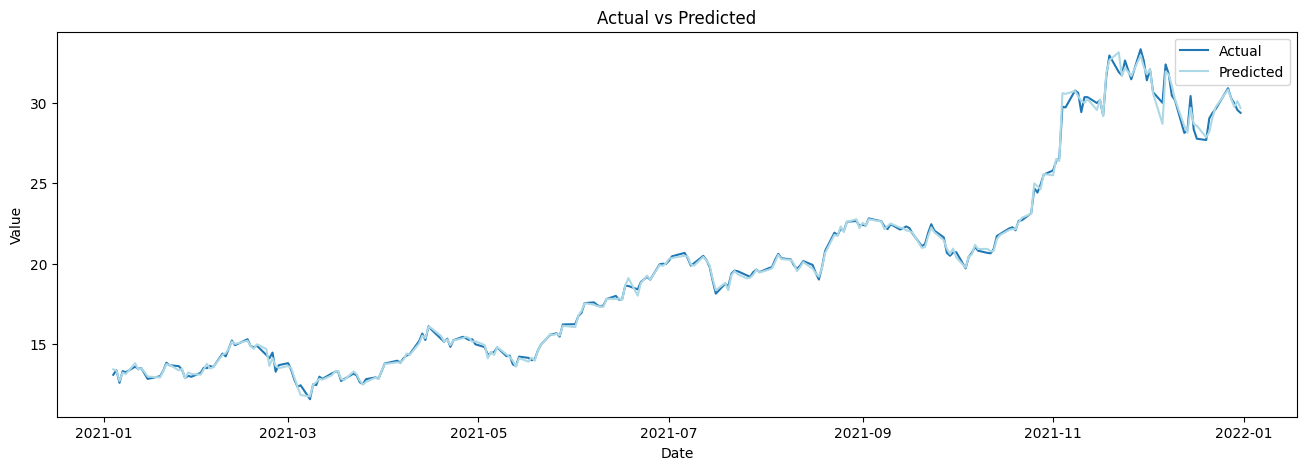

In [117]:
# it's hard to see the difference between the actual and predicted values so trim the date to a smaller range
dfp_trim = dfp[(dfp['Date'] > '2021-01-01') & (dfp['Date'] < '2022-01-01')]
dfp_plot(dfp_trim['Date'], dfp_trim['Actual'], dfp_trim['Predicted'], title="Actual vs Predicted", ylabel="Value")

## 5. Suggested improvements

### Data Preprocessing

Was the data preprocessed correctly? Imbalance of data scale can affect the model's performance. For example, if one feature is in the range of 0-1 and another feature is in the range of 1000-10000, the model might not perform well. You can use techniques like normalization or standardization to scale the data.

The hackathon requires you to use the last 30 days of the data to predict the next day's closing price. How can you modify the code to use the last 30 days of the data to predict the next day's closing price?

The hackathon also requires you to predict the stocks for S&P 500. How can you modify the code to predict the stocks for S&P 500?

### Model Type

Linear Regression is a simple model. You can try other models like LSTM, ARIMA, SVR, GBM, etc. to see if they perform better.
What about ensemble methods like Random Forest, Gradient Boosting, etc.?

It might be interesting to try different models and see which one performs better.

### Model Hyperparameters

You can search up what this means, but in simple terms, hyperparameters are the parameters that are set before the learning process begins.
You can tune the hyperparameters of the model to see if the model performs better. For example, you can change the learning rate, the number of iterations, the regularization parameter, etc.

## Feature Engineering

You can create new features from the existing features to improve the model's performance. For example, you can create moving averages, exponential moving averages, etc.
It might be helpful to do some research on the stock market and see what features are important in predicting the stock price.